In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
try:
  %tensorflow_version 2.x
except:
  pass

import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as tf_hub

TensorFlow 2.x selected.


In [0]:
from matplotlib import style
import PIL.Image as Image

import logging
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import urllib3

In [0]:
logger = tf.get_logger()

logger.setLevel(logging.ERROR)
style.use('ggplot')
tfds.disable_progress_bar()
urllib3.disable_warnings(category=urllib3.exceptions.InsecureRequestWarning)

In [0]:
dataset_rgb, dataset_rgb_info = tfds.load(name='eurosat/rgb', as_supervised=True, with_info=True)

In [6]:
dataset_rgb_info

tfds.core.DatasetInfo(
    name='eurosat',
    version=2.0.0,
    description='EuroSAT dataset is based on Sentinel-2 satellite images covering 13 spectral
bands and consisting of 10 classes with 27000 labeled and
geo-referenced samples.

Two datasets are offered:
- rgb: Contains only the optical R, G, B frequency bands encoded as JPEG image.
- all: Contains all 13 bands in the original value range (float32).

URL: https://github.com/phelber/eurosat
',
    urls=['https://github.com/phelber/eurosat'],
    features=FeaturesDict({
        'filename': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(64, 64, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=27000,
    splits={
        'train': 27000,
    },
    supervised_keys=('image', 'label'),
    citation="""@misc{helber2017eurosat,
        title={EuroSAT: A Novel Dataset and Deep Learning Benchmark for Land Use and Land Cover Classification},
       

In [0]:
training_dataset_rgb = tfds.load(name='eurosat/rgb', split='train[:70%]')
validation_dataset_rgb = tfds.load(name='eurosat/rgb', split='train[70%:90%]')
testing_dataset_rgb = tfds.load(name='eurosat/rgb', split='train[90%:]')

In [32]:
num_training_examples = 0
num_validation_examples = 0
num_testing_examples = 0

for train_i in training_dataset_rgb:
  num_training_examples += 1

for valid_i in validation_dataset_rgb:
  num_validation_examples += 1

for test_i in testing_dataset_rgb:
  num_testing_examples += 1

print("Number of training examples   : {}".format(num_training_examples))
print("Number of validation examples : {}".format(num_validation_examples))
print("Number of testing examples    : {}".format(num_testing_examples))

Number of training examples   : 18900
Number of validation examples : 5400
Number of testing examples    : 2700


In [33]:
class_names = np.array(dataset_rgb_info.features['label'].names)
class_names

array(['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway',
       'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River',
       'SeaLake'], dtype='<U20')

In [0]:
for train_dict in training_dataset_rgb.take(1):
  break

In [9]:
print(train_dict)

{'filename': <tf.Tensor: id=597, shape=(), dtype=string, numpy=b'Industrial_2384.jpg'>, 'image': <tf.Tensor: id=598, shape=(64, 64, 3), dtype=uint8, numpy=
array([[[ 72,  90,  92],
        [ 74,  92,  94],
        [ 75,  94, 100],
        ...,
        [ 81,  92,  96],
        [ 87,  88,  93],
        [ 92,  90,  95]],

       [[ 72,  90,  94],
        [ 73,  91,  95],
        [ 77,  94, 101],
        ...,
        [ 77,  90,  96],
        [ 83,  90,  98],
        [ 88,  91,  98]],

       [[ 75,  90,  97],
        [ 76,  91,  98],
        [ 86, 101, 108],
        ...,
        [ 55,  73,  83],
        [ 50,  67,  77],
        [ 55,  71,  84]],

       ...,

       [[109, 113, 116],
        [107, 110, 115],
        [102, 105, 112],
        ...,
        [106, 105, 110],
        [111, 115, 116],
        [123, 132, 129]],

       [[118, 119, 121],
        [116, 119, 124],
        [ 97,  99, 111],
        ...,
        [143, 134, 135],
        [151, 147, 144],
        [143, 142, 137]],

      

In [35]:
print(train_dict['image'].numpy())
print(train_dict['label'].numpy())

[[[ 72  90  92]
  [ 74  92  94]
  [ 75  94 100]
  ...
  [ 81  92  96]
  [ 87  88  93]
  [ 92  90  95]]

 [[ 72  90  94]
  [ 73  91  95]
  [ 77  94 101]
  ...
  [ 77  90  96]
  [ 83  90  98]
  [ 88  91  98]]

 [[ 75  90  97]
  [ 76  91  98]
  [ 86 101 108]
  ...
  [ 55  73  83]
  [ 50  67  77]
  [ 55  71  84]]

 ...

 [[109 113 116]
  [107 110 115]
  [102 105 112]
  ...
  [106 105 110]
  [111 115 116]
  [123 132 129]]

 [[118 119 121]
  [116 119 124]
  [ 97  99 111]
  ...
  [143 134 135]
  [151 147 144]
  [143 142 137]]

 [[125 126 128]
  [122 125 130]
  [125 127 140]
  ...
  [160 149 147]
  [140 130 128]
  [152 145 139]]]
4


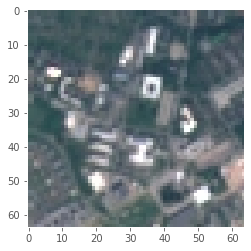

In [36]:
plt.imshow(train_dict['image'])
plt.grid(False)
plt.show()

In [0]:
for valid_dict in validation_dataset_rgb.take(1):
  break

In [38]:
print(valid_dict['image'].numpy())
print(valid_dict['label'])

[[[172 142 140]
  [169 144 140]
  [166 149 141]
  ...
  [115 109 109]
  [135 121 120]
  [137 122 119]]

 [[167 143 141]
  [167 146 141]
  [163 150 142]
  ...
  [115 106 107]
  [136 122 121]
  [136 121 118]]

 [[130 116 113]
  [129 118 114]
  [146 139 133]
  ...
  [113 103 102]
  [123 109 108]
  [130 115 112]]

 ...

 [[119 113 113]
  [121 116 113]
  [133 123 122]
  ...
  [128 114 111]
  [131 115 115]
  [125 109 109]]

 [[129 117 117]
  [129 117 117]
  [140 130 129]
  ...
  [124 113 109]
  [140 122 118]
  [141 122 118]]

 [[147 131 131]
  [145 131 130]
  [150 140 141]
  ...
  [119 108 104]
  [136 118 114]
  [154 133 128]]]
tf.Tensor(2, shape=(), dtype=int64)


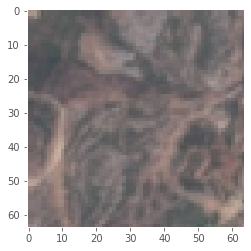

In [39]:
plt.imshow(valid_dict['image'])
plt.grid(False)
plt.show()

In [0]:
for test_dict in testing_dataset_rgb.take(600):
  test_dict = test_dict

In [41]:
print(test_dict['image'].numpy())
print(test_dict['label'].numpy())

[[[41 60 75]
  [42 61 76]
  [40 61 78]
  ...
  [39 61 75]
  [40 62 75]
  [39 61 74]]

 [[41 60 75]
  [40 62 76]
  [40 62 76]
  ...
  [38 60 74]
  [40 62 76]
  [39 61 74]]

 [[42 64 77]
  [43 65 78]
  [42 64 78]
  ...
  [37 58 75]
  [34 55 72]
  [35 57 71]]

 ...

 [[41 63 77]
  [40 64 76]
  [41 64 78]
  ...
  [33 56 72]
  [32 55 73]
  [34 57 75]]

 [[42 66 78]
  [43 67 79]
  [41 64 78]
  ...
  [35 56 73]
  [35 56 73]
  [35 56 73]]

 [[39 66 75]
  [39 66 77]
  [40 63 77]
  ...
  [34 55 72]
  [36 57 74]
  [37 58 75]]]
1


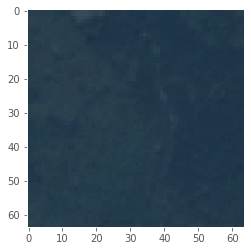

In [42]:
plt.imshow(test_dict['image'])
plt.grid(False)
plt.show()

In [43]:
dataset_sentinel, dataset_sentinel_info = tfds.load(name='eurosat/all', as_supervised=True, with_info=True)

Shuffling and writing examples to /root/tensorflow_datasets/eurosat/all/2.0.0.incompleteHP7N3N/eurosat-train.tfrecord
Dataset eurosat downloaded and prepared to /root/tensorflow_datasets/eurosat/all/2.0.0. Subsequent calls will reuse this data.


In [44]:
dataset_sentinel_info

tfds.core.DatasetInfo(
    name='eurosat',
    version=2.0.0,
    description='EuroSAT dataset is based on Sentinel-2 satellite images covering 13 spectral
bands and consisting of 10 classes with 27000 labeled and
geo-referenced samples.

Two datasets are offered:
- rgb: Contains only the optical R, G, B frequency bands encoded as JPEG image.
- all: Contains all 13 bands in the original value range (float32).

URL: https://github.com/phelber/eurosat
',
    urls=['https://github.com/phelber/eurosat'],
    features=FeaturesDict({
        'filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
        'sentinel2': Tensor(shape=[64, 64, 13], dtype=tf.float32),
    }),
    total_num_examples=27000,
    splits={
        'train': 27000,
    },
    supervised_keys=('sentinel2', 'label'),
    citation="""@misc{helber2017eurosat,
        title={EuroSAT: A Novel Dataset and Deep Learning Benchmark for Land Use and Land Cover Classificati

In [0]:
training_dataset_sentinel = tfds.load(name='eurosat/all', split='train[:70%]')
validation_dataset_sentinel = tfds.load(name='eurosat/all', split='train[70%:90%]')
testing_dataset_sentinel = tfds.load(name='eurosat/all', split='train[90%:]')

In [46]:
num_training_examples = 0
num_validation_examples = 0
num_testing_examples = 0

for train_i in training_dataset_sentinel:
  num_training_examples += 1

for valid_i in validation_dataset_sentinel:
  num_validation_examples += 1

for test_i in testing_dataset_sentinel:
  num_testing_examples += 1

print("Number of training examples   : {}".format(num_training_examples))
print("Number of validation examples : {}".format(num_validation_examples))
print("Number of testing examples    : {}".format(num_testing_examples))

Number of training examples   : 18900
Number of validation examples : 5400
Number of testing examples    : 2700


In [47]:
class_names = np.array(dataset_sentinel_info.features['label'].names)
class_names

array(['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway',
       'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River',
       'SeaLake'], dtype='<U20')

In [0]:
for train_dict in training_dataset_sentinel.take(1):
  break

In [49]:
print(train_dict['sentinel2'].numpy())
print(train_dict['label'].numpy())

[[[1045.  745.  673. ... 1685.  618. 4445.]
  [1045.  745.  673. ... 1685.  618. 4445.]
  [1045.  739.  674. ... 1683.  610. 4423.]
  ...
  [1049.  749.  695. ... 1630.  623. 3927.]
  [1050.  735.  677. ... 1625.  624. 3916.]
  [1050.  740.  694. ... 1612.  616. 3891.]]

 [[1045.  745.  673. ... 1685.  618. 4445.]
  [1045.  745.  673. ... 1685.  618. 4445.]
  [1045.  739.  674. ... 1683.  610. 4423.]
  ...
  [1049.  749.  695. ... 1630.  623. 3927.]
  [1050.  735.  677. ... 1625.  624. 3916.]
  [1050.  740.  694. ... 1612.  616. 3891.]]

 [[1045.  743.  696. ... 1727.  638. 4513.]
  [1045.  743.  696. ... 1727.  638. 4513.]
  [1045.  739.  689. ... 1707.  624. 4453.]
  ...
  [1050.  747.  659. ... 1626.  630. 3862.]
  [1050.  740.  722. ... 1621.  627. 3858.]
  [1051.  742.  688. ... 1609.  617. 3851.]]

 ...

 [[1045.  731.  632. ... 1556.  568. 4085.]
  [1045.  731.  632. ... 1556.  568. 4085.]
  [1045.  745.  653. ... 1577.  573. 4193.]
  ...
  [1045.  755.  678. ... 1633.  582. 426

In [50]:
print(train_dict)

{'filename': <tf.Tensor: id=329208, shape=(), dtype=string, numpy=b'Forest_865.tif'>, 'label': <tf.Tensor: id=329209, shape=(), dtype=int64, numpy=1>, 'sentinel2': <tf.Tensor: id=329210, shape=(64, 64, 13), dtype=float32, numpy=
array([[[1045.,  745.,  673., ..., 1685.,  618., 4445.],
        [1045.,  745.,  673., ..., 1685.,  618., 4445.],
        [1045.,  739.,  674., ..., 1683.,  610., 4423.],
        ...,
        [1049.,  749.,  695., ..., 1630.,  623., 3927.],
        [1050.,  735.,  677., ..., 1625.,  624., 3916.],
        [1050.,  740.,  694., ..., 1612.,  616., 3891.]],

       [[1045.,  745.,  673., ..., 1685.,  618., 4445.],
        [1045.,  745.,  673., ..., 1685.,  618., 4445.],
        [1045.,  739.,  674., ..., 1683.,  610., 4423.],
        ...,
        [1049.,  749.,  695., ..., 1630.,  623., 3927.],
        [1050.,  735.,  677., ..., 1625.,  624., 3916.],
        [1050.,  740.,  694., ..., 1612.,  616., 3891.]],

       [[1045.,  743.,  696., ..., 1727.,  638., 4513.],
